<a href="https://colab.research.google.com/github/TemrinaDarya/turbines-2022/blob/gas_turbines_hw4/gas_turbines_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

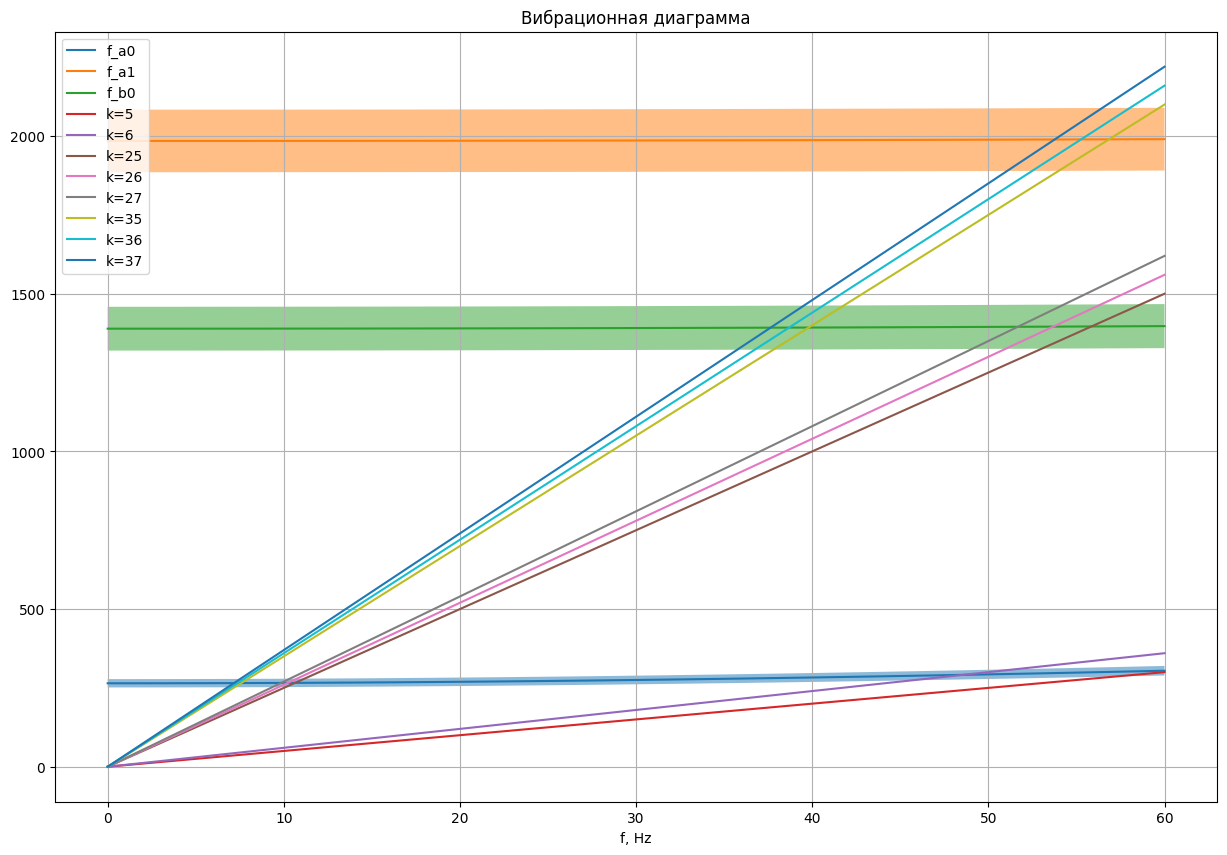

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

MPa = 1e6
kW = 1e3
MW = 1e6
mm = 1e-3

m = 8
t = 25 * mm

beta = 75
density = 8000
E = 2 * (10**11)
z = 84
d = 1.25
l = 0.15
#площадь сечения лопатки
F = 19.44 * (10 ** (-4)) 
J = 1.43 * (10 ** (-8))
#размер бандажной ленты
delta = 5 * mm
B = 60 * mm 

i = (J / F) ** 0.5

_lambda = l / i
_lambda

psi = 0.98
     
def stat_freq(i):
    _m = {
        1: 0.56,
        2: 3.51,
        3: 9.82
 
    }
    first = psi * _m[i] / (l ** 2)
    sec = ((E * J) / (density * F)) ** 0.5
    return first * sec  
     
stat_freq(1), stat_freq(2), stat_freq(3)

H = 0.12
J_b = B * (delta ** 3) / 12

k = (12 * (m - 1) * H * E * J_b * l * np.sin(np.deg2rad(beta)) ** 2) / (m * t * J * E)

nu = B * delta * t / (F * l)

f_a0 = stat_freq(1) * 0.8
f_a1 = stat_freq(1) * 6
f_b0 = stat_freq(1) * 4.2

f_a0, f_a1, f_b0 
B_band = 0.5 * ((d/l) - 1) * ((nu+1/2)/(nu+1/3)) + np.sin(np.deg2rad(beta)) ** 2

def to_dyn_freq(f, n=50):
    root = (1 + B_band * (n / f) ** 2) ** 0.5
    return f * root
     
B_band

to_dyn_freq(f_a0), to_dyn_freq(f_a1), to_dyn_freq(f_b0)

def min_max(f, delta=0.05):
    return f * (1-delta) , f * (1 + delta)
 
n_l = np.linspace(0, 60)
min_l, max_l = min_max(to_dyn_freq(f_a0, n=n_l))
min_l1, max_l1 = min_max(to_dyn_freq(f_a1, n=n_l))
min_l2, max_l2 = min_max(to_dyn_freq(f_b0, n=n_l))

def k_line(k, n=n_l):
    return k * n_l
     

fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(n_l, to_dyn_freq(f_a0, n=n_l), label='f_a0')
ax.plot(n_l, to_dyn_freq(f_a1, n=n_l), label='f_a1')
ax.plot(n_l, to_dyn_freq(f_b0, n=n_l), label='f_b0')
ax.fill_between(n_l, y1=min_l, y2=max_l, alpha=0.5)
ax.fill_between(n_l, y1=min_l1, y2=max_l1, alpha=0.5)
ax.fill_between(n_l, y1=min_l2, y2=max_l2, alpha=0.5)


ax.plot(n_l, k_line(5), label=f'k={5}')
ax.plot(n_l, k_line(6), label=f'k={6}')
ax.plot(n_l, k_line(25), label=f'k={25}')
ax.plot(n_l, k_line(26), label=f'k={26}')
ax.plot(n_l, k_line(27), label=f'k={27}')
ax.plot(n_l, k_line(35), label=f'k={35}')
ax.plot(n_l, k_line(36), label=f'k={36}')
ax.plot(n_l, k_line(37), label=f'k={37}')

ax.set_xlabel("n, rps")
ax.set_xlabel("f, Hz")
ax.grid()
ax.legend()
ax.set_title("Вибрационная диаграмма");

Вывод: Вибрационная диаграмма позволяет определить опасные зоны работы лопаточного аппарата. Следовательно, с помощью нее можно определить 
предельно допустимые коэффициенты кратности и в зависимости от этого определить конструкцию, которая будет проходить по параметрам надежности. В нашем случае проверка была осуществлена по форме колебаний А0 и А1, при которых все лопатки находятся в одной фазе, а также по внутрипакетной форме колебаний В0. Исходя из полученной зависимости можно сделать вывод, что для каждой формы колебаний пакета собственная частота возрастает с увеличением жесткости бандажа, мерой которого является коэффициент k, и снижается с увеличением массы бандажа